# Minnesota Weather Analysis
## The influence of Weather on the crime rate of Minnesota 

### Contents
- Data Preparation
- Surronding Game Weather
- After Game Weather
- Good Weather
- Bad Weather
- Comparisons

In [1]:
import os.path
import datetime
import pylab
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
if not os.path.exists('../../data/prep/minWea_prep.csv' ):
    print("Missing dataset file")

In [3]:
ch = pd.read_csv( '../../data/prep/minWea_prep.csv', index_col="Date", parse_dates=True)
dch = pd.read_csv( '../../data/prep/minWea_dom_prep.csv', index_col="Date", parse_dates=True)

In [4]:
ch['Primary Type'] = ch['Description_y']

In [5]:
ch.head()

,Wind Speed,Description_x,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Description_y,Primary Type
Date,,,,,,,,,,,
2012-10-07 18:00:00,4.0,overcast clouds,5.30,2,0,2,4,Bad,NFL,domestic violence,domestic violence
2012-10-14 20:00:00,2.0,light rain,11.40,0,2,3,5,Bad,NFL,assault,assault
2012-10-14 20:00:00,2.0,light rain,11.40,0,2,3,5,Bad,NFL,assault,assault
2012-10-21 02:00:00,1.0,few clouds,6.37,3,0,3,6,Moderate,NFL,assault,assault
2012-10-21 02:00:00,1.0,few clouds,6.37,3,0,3,6,Moderate,NFL,domestic violence,domestic violence


In [6]:
ch = ch.drop(ch.columns[[9]], axis = 1)

In [7]:
ch = ch.rename(columns={'Description_x': 'Description'})

In [8]:
ch.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type
Date,,,,,,,,,,
2012-10-07 18:00:00,4.0,overcast clouds,5.30,2,0,2,4,Bad,NFL,domestic violence
2012-10-14 20:00:00,2.0,light rain,11.40,0,2,3,5,Bad,NFL,assault
2012-10-14 20:00:00,2.0,light rain,11.40,0,2,3,5,Bad,NFL,assault
2012-10-21 02:00:00,1.0,few clouds,6.37,3,0,3,6,Moderate,NFL,assault
2012-10-21 02:00:00,1.0,few clouds,6.37,3,0,3,6,Moderate,NFL,domestic violence


In [9]:
dch.head()

,Overall,Weather,Domestic,Description_y
Date,,,,
2012-10-07 18:00:00,4,Bad,NFL,domestic violence
2012-10-08 01:00:00,5,Bad,NFL,assault
2012-10-22 01:00:00,7,Moderate,NFL,assault
2012-10-26 01:00:00,4,Bad,NFL,domestic violence
2012-10-26 10:00:00,2,Bad,NFL,assault


In [10]:
dch['Primary Type'] = dch['Description_y']

In [11]:
dch.head()

,Overall,Weather,Domestic,Description_y,Primary Type
Date,,,,,
2012-10-07 18:00:00,4,Bad,NFL,domestic violence,domestic violence
2012-10-08 01:00:00,5,Bad,NFL,assault,assault
2012-10-22 01:00:00,7,Moderate,NFL,assault,assault
2012-10-26 01:00:00,4,Bad,NFL,domestic violence,domestic violence
2012-10-26 10:00:00,2,Bad,NFL,assault,assault


In [12]:
dch = dch.drop(dch.columns[[3]], axis = 1)

In [13]:
dch.head()

,Overall,Weather,Domestic,Primary Type
Date,,,,
2012-10-07 18:00:00,4,Bad,NFL,domestic violence
2012-10-08 01:00:00,5,Bad,NFL,assault
2012-10-22 01:00:00,7,Moderate,NFL,assault
2012-10-26 01:00:00,4,Bad,NFL,domestic violence
2012-10-26 10:00:00,2,Bad,NFL,assault


## 2 hours before and 5 hours after

In [14]:
ch1 = ch.groupby('Primary Type')[('Primary Type')].count()
ch1.sort_values(ascending=False)

Primary Type
assault              190
domestic violence    128
vandalism             95
Name: Primary Type, dtype: int64

In [15]:
ch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(ch)

Primary Type
assault              46.004843
domestic violence    30.992736
vandalism            23.002421
Name: Primary Type, dtype: float64

In [16]:
ass1 = ch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(ch)

Text(0.5,1,'Total crime percentage around Games')

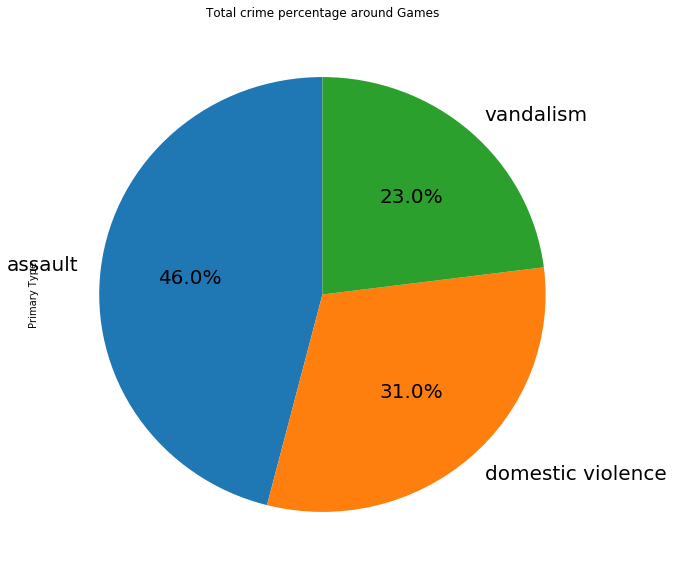

In [17]:
ass1.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Total crime percentage around Games')

# 7 hours after

In [18]:
dch1 = dch.groupby('Primary Type')[('Primary Type')].count()
dch1.sort_values(ascending=False)

Primary Type
assault              221
domestic violence    132
vandalism             54
Name: Primary Type, dtype: int64

In [19]:
dch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dch)

Primary Type
assault              54.299754
domestic violence    32.432432
vandalism            13.267813
Name: Primary Type, dtype: float64

In [20]:
dome = dch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dch)

Text(0.5,1,'Total crime percentage in 7 hours after game')

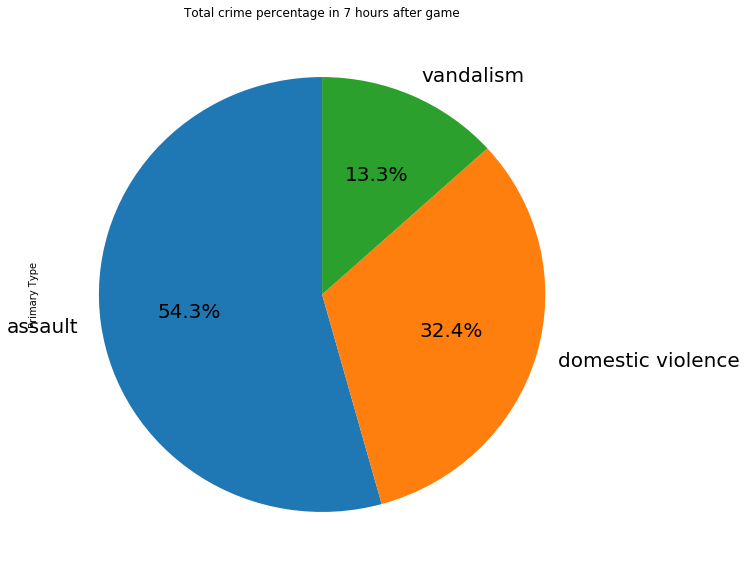

In [21]:
dome.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Total crime percentage in 7 hours after game')

# Good

In [22]:
good = ch[ch["Weather"] == "Good"]

In [23]:
good1 = good.groupby('Primary Type')[('Primary Type')].count()
good1.sort_values(ascending=False)

Primary Type
vandalism            6
domestic violence    5
assault              5
Name: Primary Type, dtype: int64

In [24]:
good.groupby('Primary Type')[('Primary Type')].size()*100/len(good)

Primary Type
assault              31.25
domestic violence    31.25
vandalism            37.50
Name: Primary Type, dtype: float64

In [25]:
gd = good.groupby('Primary Type')[('Primary Type')].size()*100/len(good)

Text(0.5,1,'Good weather crime percentage surrounding game')

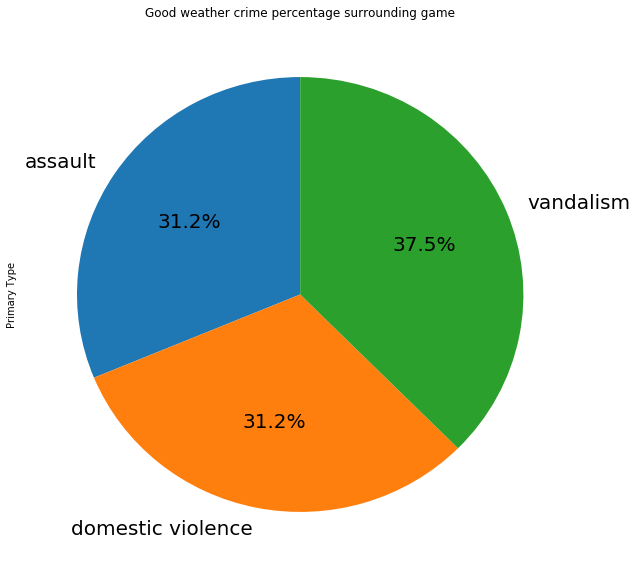

In [26]:
gd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Good weather crime percentage surrounding game')

In [27]:
good.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type
Date,,,,,,,,,,
2013-03-30 20:00:00,3.0,sky is clear,8.250,3,2,3,8,Good,NBA,assault
2013-09-08 10:00:00,4.0,few clouds,17.686,3,3,2,8,Good,NFL,vandalism
2013-09-08 12:00:00,4.0,few clouds,18.394,3,3,2,8,Good,NFL,vandalism
2013-09-08 18:00:00,4.0,sky is clear,21.203,3,3,2,8,Good,NFL,assault
2013-09-08 19:00:00,4.0,sky is clear,21.203,3,3,2,8,Good,NFL,vandalism


In [28]:
good.groupby('Overall')[('Weather')].count()

Overall
8    12
9     4
Name: Weather, dtype: int64

In [29]:
conditions = [
    (good['Overall'] == 9)]
choices = ['Very good']
good['Heat'] = np.select(conditions, choices, default='Good')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
good.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type,Heat
Date,,,,,,,,,,,
2013-03-30 20:00:00,3.0,sky is clear,8.250,3,2,3,8,Good,NBA,assault,Good
2013-09-08 10:00:00,4.0,few clouds,17.686,3,3,2,8,Good,NFL,vandalism,Good
2013-09-08 12:00:00,4.0,few clouds,18.394,3,3,2,8,Good,NFL,vandalism,Good
2013-09-08 18:00:00,4.0,sky is clear,21.203,3,3,2,8,Good,NFL,assault,Good
2013-09-08 19:00:00,4.0,sky is clear,21.203,3,3,2,8,Good,NFL,vandalism,Good


In [31]:
vg = good[good["Heat"] == "Very good"]

In [32]:
vg1 = vg.groupby('Primary Type')[('Primary Type')].count()
vg1.sort_values(ascending=False)

Primary Type
vandalism            2
domestic violence    2
Name: Primary Type, dtype: int64

In [33]:
vg.groupby('Primary Type')[('Primary Type')].size()*100/len(vg)

Primary Type
domestic violence    50.0
vandalism            50.0
Name: Primary Type, dtype: float64

In [34]:
wvg = vg.groupby('Primary Type')[('Primary Type')].size()*100/len(vg)

Text(0.5,1,'Very good weather crime percentage surrounding game')

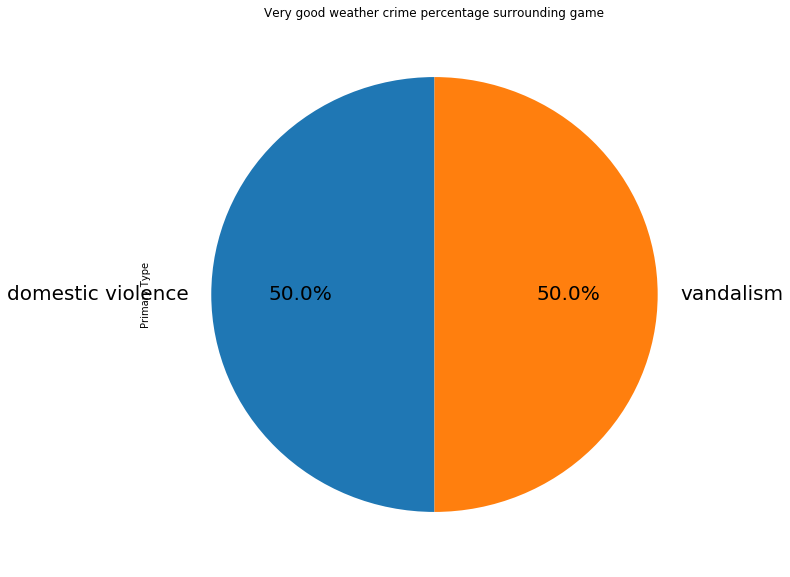

In [35]:
wvg.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very good weather crime percentage surrounding game')

### Good Weather and Domestic violence

In [36]:
dgood = dch[dch["Weather"] == "Good"]

In [37]:
dgood1 = dgood.groupby('Primary Type')[('Primary Type')].count()
dgood1.sort_values(ascending=False)

Primary Type
assault              10
domestic violence     5
vandalism             3
Name: Primary Type, dtype: int64

In [38]:
dgood.groupby('Primary Type')[('Primary Type')].size()*100/len(dgood)

Primary Type
assault              55.555556
domestic violence    27.777778
vandalism            16.666667
Name: Primary Type, dtype: float64

In [39]:
dgd = dgood.groupby('Primary Type')[('Primary Type')].size()*100/len(dgood)

Text(0.5,1,'Good weather crime percentage after game')

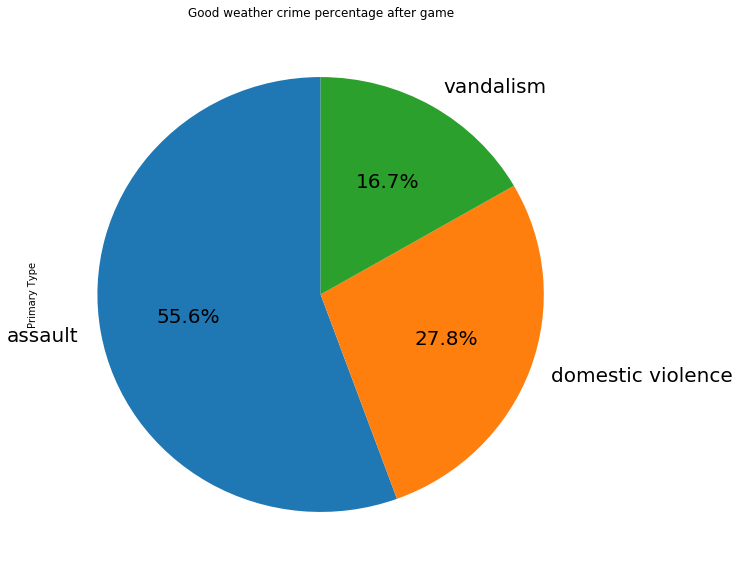

In [40]:
dgd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Good weather crime percentage after game')

In [41]:
dgood.head()

,Overall,Weather,Domestic,Primary Type
Date,,,,
2013-03-30 20:00:00,8,Good,NBA,assault
2013-03-31 00:00:00,8,Good,NBA,assault
2013-09-08 18:00:00,8,Good,NFL,assault
2013-09-08 19:00:00,8,Good,NFL,vandalism
2013-09-09 00:00:00,9,Good,NFL,assault


In [42]:
dgood.groupby('Overall')[('Weather')].count()

Overall
8    15
9     3
Name: Weather, dtype: int64

In [43]:
conditions = [
    (dgood['Overall'] == 9)]
choices = ['Very good']
dgood['Heat'] = np.select(conditions, choices, default='Good')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [44]:
dgood.head()

,Overall,Weather,Domestic,Primary Type,Heat
Date,,,,,
2013-03-30 20:00:00,8,Good,NBA,assault,Good
2013-03-31 00:00:00,8,Good,NBA,assault,Good
2013-09-08 18:00:00,8,Good,NFL,assault,Good
2013-09-08 19:00:00,8,Good,NFL,vandalism,Good
2013-09-09 00:00:00,9,Good,NFL,assault,Very good


In [45]:
dvg = dgood[dgood["Heat"] == "Very good"]

In [46]:
dvg1 = dvg.groupby('Primary Type')[('Primary Type')].count()
dvg1.sort_values(ascending=False)

Primary Type
domestic violence    2
assault              1
Name: Primary Type, dtype: int64

In [47]:
dvg.groupby('Primary Type')[('Primary Type')].size()*100/len(dvg)

Primary Type
assault              33.333333
domestic violence    66.666667
Name: Primary Type, dtype: float64

In [48]:
wdvg = dvg.groupby('Primary Type')[('Primary Type')].size()*100/len(dvg)

Text(0.5,1,'Very good weather crime percentage after game')

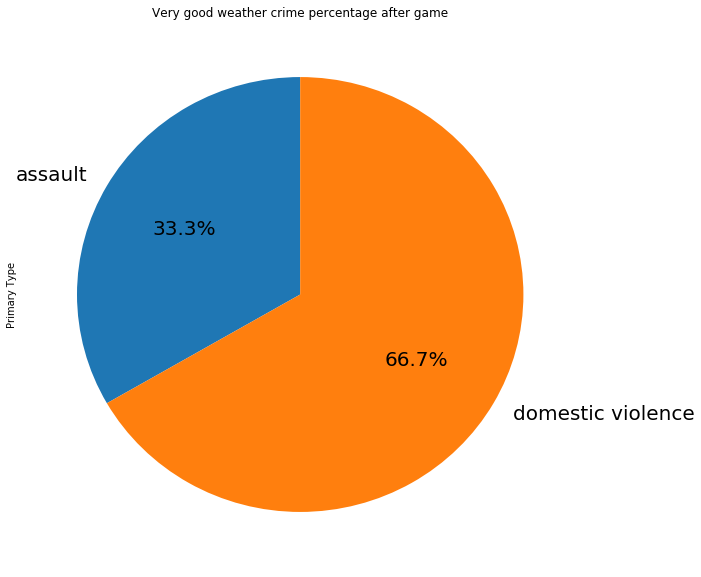

In [49]:
wdvg.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very good weather crime percentage after game')

# Bad

In [50]:
bad = ch[ch["Weather"] == "Bad"]

In [51]:
bad1 = bad.groupby('Primary Type')[('Primary Type')].count()
bad1.sort_values(ascending=False)

Primary Type
assault              148
domestic violence    101
vandalism             61
Name: Primary Type, dtype: int64

In [52]:
bad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(bad)

Primary Type
assault              47.741935
domestic violence    32.580645
vandalism            19.677419
Name: Primary Type, dtype: float64

In [53]:
bd = bad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(bad)

Text(0.5,1,'Bad weather crime percentage surrounding game')

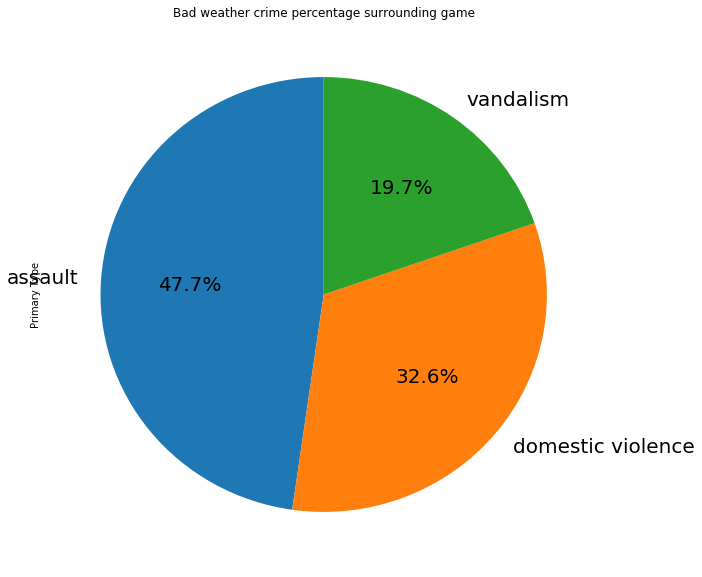

In [54]:
bd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Bad weather crime percentage surrounding game')

In [55]:
bad.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type
Date,,,,,,,,,,
2012-10-07 18:00:00,4.0,overcast clouds,5.30,2,0,2,4,Bad,NFL,domestic violence
2012-10-14 20:00:00,2.0,light rain,11.40,0,2,3,5,Bad,NFL,assault
2012-10-14 20:00:00,2.0,light rain,11.40,0,2,3,5,Bad,NFL,assault
2012-10-26 01:00:00,4.0,drizzle,10.29,0,2,2,4,Bad,NFL,domestic violence
2012-11-02 20:00:00,6.0,scattered clouds,6.85,2,0,2,4,Bad,NBA,assault


In [56]:
conditions = [
    (bad['Overall'] < 3)]
choices = ['Very bad']
bad['Cold'] = np.select(conditions, choices, default='Bad')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [57]:
bad.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type,Cold
Date,,,,,,,,,,,
2012-10-07 18:00:00,4.0,overcast clouds,5.30,2,0,2,4,Bad,NFL,domestic violence,Bad
2012-10-14 20:00:00,2.0,light rain,11.40,0,2,3,5,Bad,NFL,assault,Bad
2012-10-14 20:00:00,2.0,light rain,11.40,0,2,3,5,Bad,NFL,assault,Bad
2012-10-26 01:00:00,4.0,drizzle,10.29,0,2,2,4,Bad,NFL,domestic violence,Bad
2012-11-02 20:00:00,6.0,scattered clouds,6.85,2,0,2,4,Bad,NBA,assault,Bad


In [58]:
vb = bad[bad["Cold"] == "Very bad"]

In [59]:
vb1 = vb.groupby('Primary Type')[('Primary Type')].count()
vb1.sort_values(ascending=False)

Primary Type
assault              18
vandalism            10
domestic violence     9
Name: Primary Type, dtype: int64

In [60]:
vb.groupby('Primary Type')[('Primary Type')].size()*100/len(vb)

Primary Type
assault              48.648649
domestic violence    24.324324
vandalism            27.027027
Name: Primary Type, dtype: float64

In [61]:
wvb = vb.groupby('Primary Type')[('Primary Type')].size()*100/len(vb)

Text(0.5,1,'Very bad weather crime percentage surrounding game')

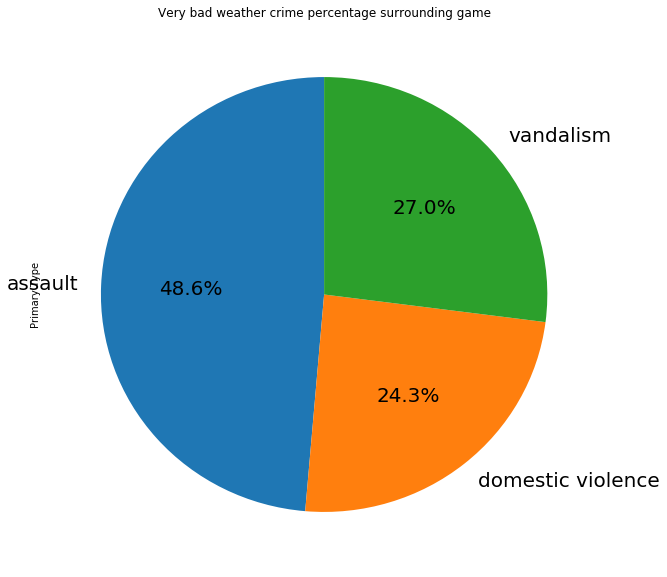

In [62]:
wvb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very bad weather crime percentage surrounding game')

### Bad Weather and Domestic Violence

In [63]:
dbad = dch[dch["Weather"] == "Bad"]

In [64]:
dbad1 = dbad.groupby('Primary Type')[('Primary Type')].count()
dbad1.sort_values(ascending=False)

Primary Type
assault              165
domestic violence    107
vandalism             42
Name: Primary Type, dtype: int64

In [65]:
dbad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dbad)

Primary Type
assault              52.547771
domestic violence    34.076433
vandalism            13.375796
Name: Primary Type, dtype: float64

In [66]:
wdb = dbad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dbad)

Text(0.5,1,'Very bad weather crime percentage after game')

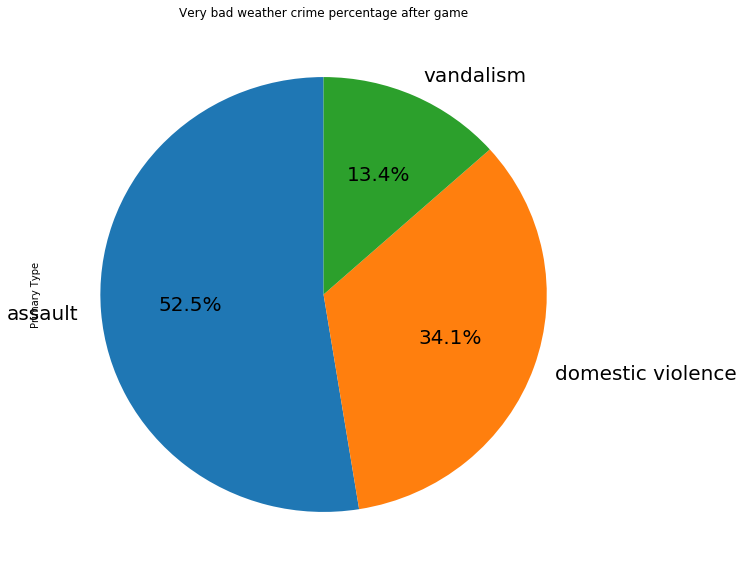

In [67]:
wdb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very bad weather crime percentage after game')

In [68]:
dbad.head()

,Overall,Weather,Domestic,Primary Type
Date,,,,
2012-10-07 18:00:00,4,Bad,NFL,domestic violence
2012-10-08 01:00:00,5,Bad,NFL,assault
2012-10-26 01:00:00,4,Bad,NFL,domestic violence
2012-10-26 10:00:00,2,Bad,NFL,assault
2012-11-02 20:00:00,4,Bad,NBA,assault


In [69]:
conditions = [
    (dbad['Overall'] < 3)]
choices = ['Very bad']
dbad['Cold'] = np.select(conditions, choices, default='Bad')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [70]:
dbad.head()

,Overall,Weather,Domestic,Primary Type,Cold
Date,,,,,
2012-10-07 18:00:00,4,Bad,NFL,domestic violence,Bad
2012-10-08 01:00:00,5,Bad,NFL,assault,Bad
2012-10-26 01:00:00,4,Bad,NFL,domestic violence,Bad
2012-10-26 10:00:00,2,Bad,NFL,assault,Very bad
2012-11-02 20:00:00,4,Bad,NBA,assault,Bad


In [71]:
dvb = dbad[dbad["Cold"] == "Very bad"]

In [72]:
dvb1 = dvb.groupby('Primary Type')[('Primary Type')].count()
dvb1.sort_values(ascending=False)

Primary Type
assault              16
domestic violence     9
vandalism             4
Name: Primary Type, dtype: int64

In [73]:
dvb.groupby('Primary Type')[('Primary Type')].size()*100/len(dvb)

Primary Type
assault              55.172414
domestic violence    31.034483
vandalism            13.793103
Name: Primary Type, dtype: float64

In [74]:
wdvb = dvb.groupby('Primary Type')[('Primary Type')].size()*100/len(dvb)

Text(0.5,1,'Very bad weather crime percentage after game')

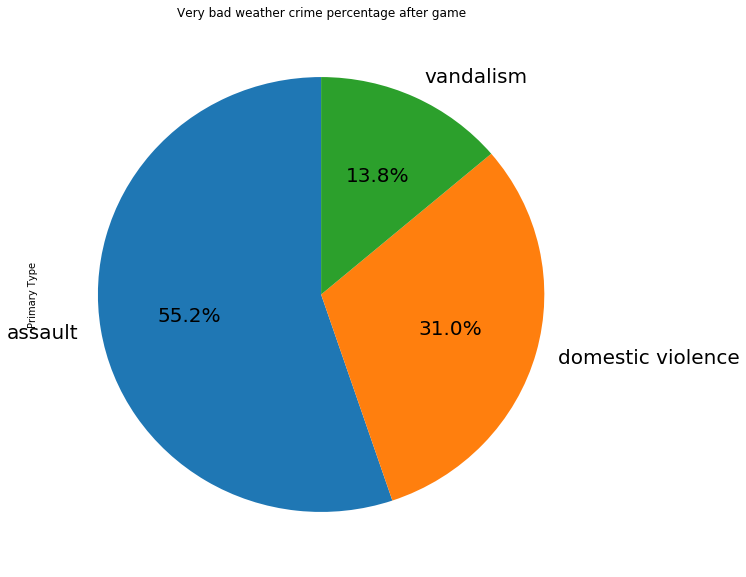

In [75]:
wdvb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very bad weather crime percentage after game')

# Moderate

In [76]:
mod = ch[ch["Weather"] == "Moderate"]

In [77]:
mod1 = mod.groupby('Primary Type')[('Primary Type')].count()
mod1.sort_values(ascending=False)

Primary Type
assault              37
vandalism            28
domestic violence    22
Name: Primary Type, dtype: int64

In [78]:
mod.groupby('Primary Type')[('Primary Type')].size() * 100 / len(mod)

Primary Type
assault              42.528736
domestic violence    25.287356
vandalism            32.183908
Name: Primary Type, dtype: float64

In [79]:
md = mod.groupby('Primary Type')[('Primary Type')].size() * 100 / len(mod)

Text(0.5,1,'Moderate weather crime percentage surrounding game')

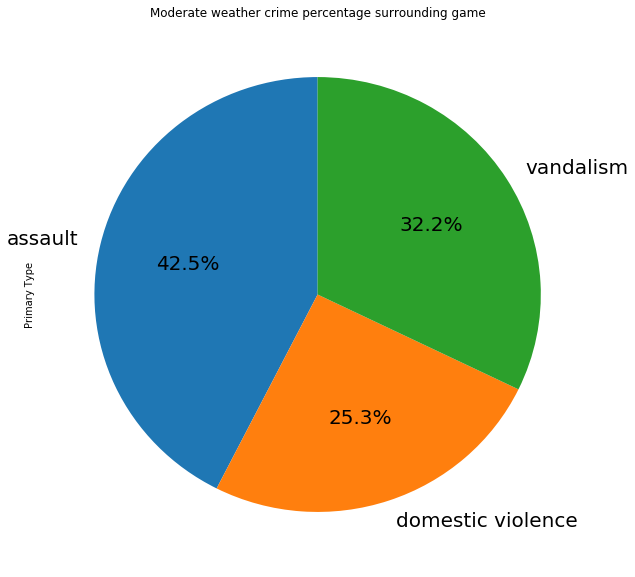

In [80]:
md.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Moderate weather crime percentage surrounding game')

# Comparison

### Surrounding Game (Focusing on Assault and Vandalism)

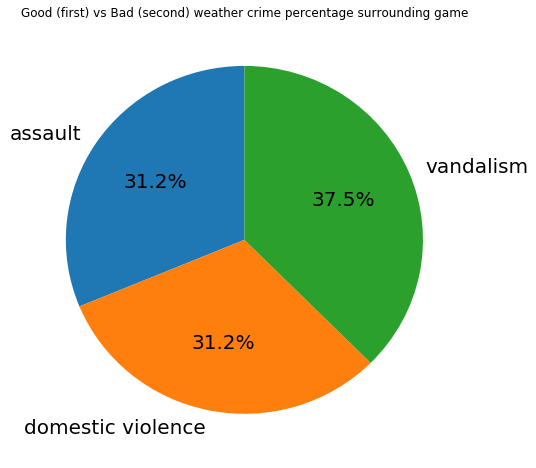

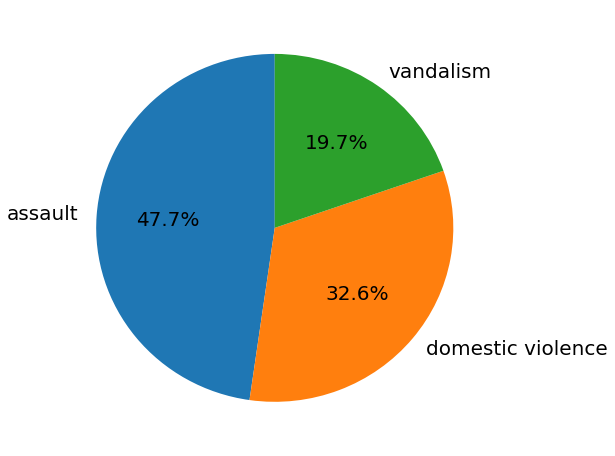

In [81]:
gd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
plt.title('Good (first) vs Bad (second) weather crime percentage surrounding game')
pylab.ylabel(' ')
plt.show()

bd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
pylab.ylabel(' ')
plt.show()

### After Game (Focusing on Domestic Violence)

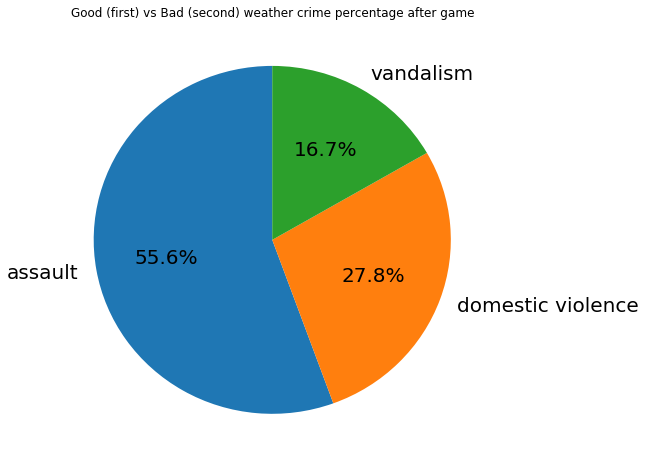

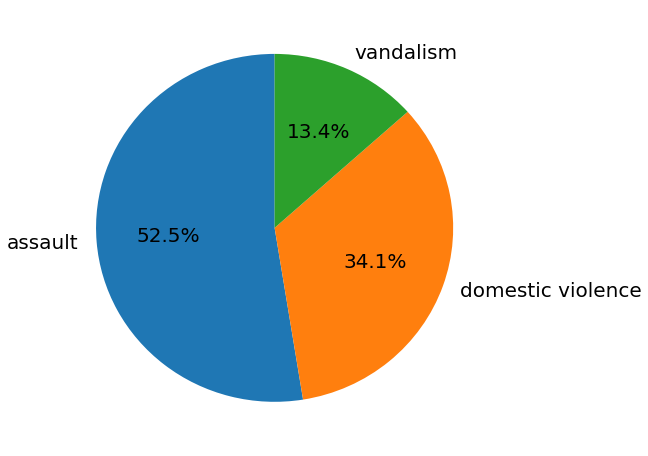

In [82]:
dgd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
plt.title('Good (first) vs Bad (second) weather crime percentage after game')
pylab.ylabel('')
plt.show()

wdb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
pylab.ylabel('')
plt.show()

### Domestic Overall

In [83]:
r9 = dch[dch["Overall"] == 9]
r9.groupby('Primary Type')[('Weather')].size() * 100 / len(r9)

Primary Type
assault              33.333333
domestic violence    66.666667
Name: Weather, dtype: float64

In [84]:
r8 = dch[dch["Overall"] == 8]
r8.groupby('Primary Type')[('Weather')].size() * 100 / len(r8)

Primary Type
assault              60.0
domestic violence    20.0
vandalism            20.0
Name: Weather, dtype: float64

In [85]:
r7 = dch[dch["Overall"] == 7]
r7.groupby('Primary Type')[('Weather')].size() * 100 / len(r7)

Primary Type
assault      90.909091
vandalism     9.090909
Name: Weather, dtype: float64

In [86]:
r6 = dch[dch["Overall"] == 6]
r6.groupby('Primary Type')[('Weather')].size() * 100 / len(r6)

Primary Type
assault              56.25
domestic violence    31.25
vandalism            12.50
Name: Weather, dtype: float64

In [87]:
r5 = dch[dch["Overall"] == 5]
r5.groupby('Primary Type')[('Weather')].size() * 100 / len(r5)

Primary Type
assault              52.592593
domestic violence    37.777778
vandalism             9.629630
Name: Weather, dtype: float64

In [88]:
r4 = dch[dch["Overall"] == 4]
r4.groupby('Primary Type')[('Weather')].size() * 100 / len(r4)

Primary Type
assault              54.464286
domestic violence    26.785714
vandalism            18.750000
Name: Weather, dtype: float64

In [89]:
r3 = dch[dch["Overall"] == 3]
r3.groupby('Primary Type')[('Weather')].size() * 100 / len(r3)

Primary Type
assault              44.736842
domestic violence    44.736842
vandalism            10.526316
Name: Weather, dtype: float64

In [90]:
r2 = dch[dch["Overall"] == 2]
r2.groupby('Primary Type')[('Weather')].size() * 100 / len(r2)

Primary Type
assault              55.172414
domestic violence    31.034483
vandalism            13.793103
Name: Weather, dtype: float64

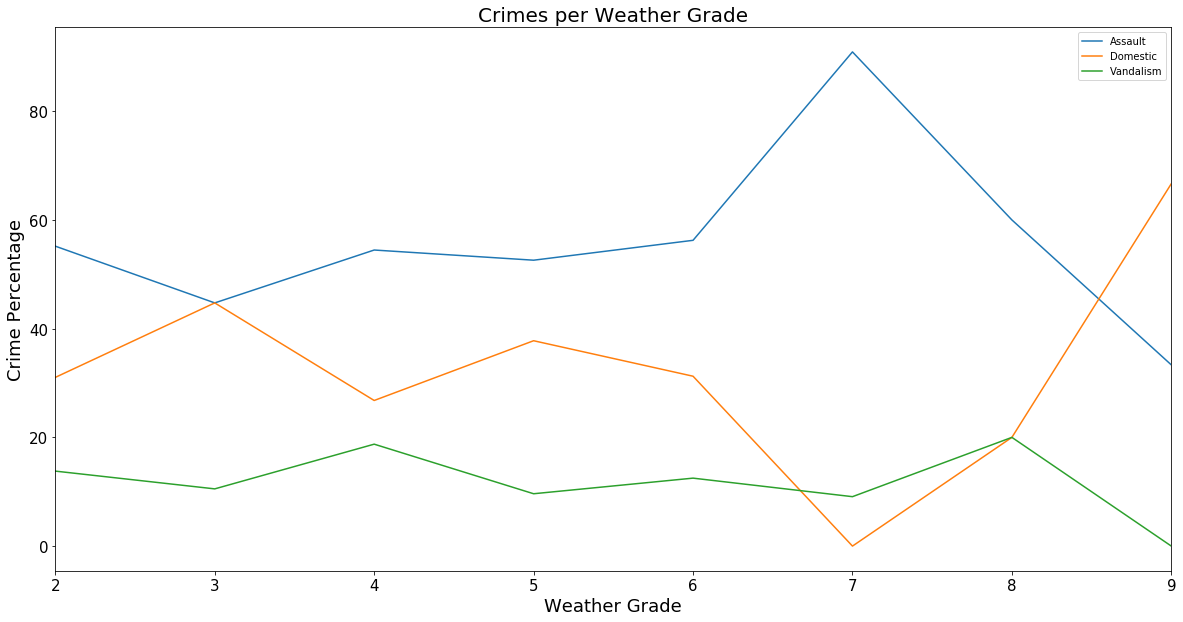

In [91]:
data = pd.DataFrame({  'Assault':[55.172414,44.736842,54.464286,52.592593,56.25,90.909091,60.0,33.333333], 
                     'Domestic':[31.034483,44.736842,26.785714,37.777778,31.25,0,20.0,66.666667], 
                     'Vandalism':[13.793103,10.526316,18.750000,9.629630,12.50,9.090909,20.0,0], }, 
                    index=range(2,10))

data.plot(figsize = (20, 10))
#ax.set(xlabel="Weather Grade", ylabel="Crime percentage")
plt.xlabel('Weather Grade', fontsize=18)
plt.ylabel('Crime Percentage', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Crimes per Weather Grade', fontsize = 20)
plt.show()

This graph is very skewed due to the small volume of crime. At weather grading 7 there are no records of domestic violence so the percentage is 0. Then at 9 there are only 3 records in total and 2 of them are domestic. 

### Assault and Vandalism Overall

In [92]:
r9 = ch[ch["Overall"] == 9]
r9.groupby('Primary Type')[('Weather')].size() * 100 / len(r9)

Primary Type
domestic violence    50.0
vandalism            50.0
Name: Weather, dtype: float64

In [93]:
r8 = ch[ch["Overall"] == 8]
r8.groupby('Primary Type')[('Weather')].size() * 100 / len(r8)

Primary Type
assault              41.666667
domestic violence    25.000000
vandalism            33.333333
Name: Weather, dtype: float64

In [94]:
r7 = ch[ch["Overall"] == 7]
r7.groupby('Primary Type')[('Weather')].size() * 100 / len(r7)

Primary Type
assault              44.444444
domestic violence    16.666667
vandalism            38.888889
Name: Weather, dtype: float64

In [95]:
r6 = ch[ch["Overall"] == 6]
r6.groupby('Primary Type')[('Weather')].size() * 100 / len(r6)

Primary Type
assault              42.028986
domestic violence    27.536232
vandalism            30.434783
Name: Weather, dtype: float64

In [96]:
r5 = ch[ch["Overall"] == 5]
r5.groupby('Primary Type')[('Weather')].size() * 100 / len(r5)

Primary Type
assault              50.370370
domestic violence    34.074074
vandalism            15.555556
Name: Weather, dtype: float64

In [97]:
r4 = ch[ch["Overall"] == 4]
r4.groupby('Primary Type')[('Weather')].size() * 100 / len(r4)

Primary Type
assault              44.897959
domestic violence    29.591837
vandalism            25.510204
Name: Weather, dtype: float64

In [98]:
r3 = ch[ch["Overall"] == 3]
r3.groupby('Primary Type')[('Weather')].size() * 100 / len(r3)

Primary Type
assault              45.0
domestic violence    42.5
vandalism            12.5
Name: Weather, dtype: float64

In [99]:
r2 = ch[ch["Overall"] == 2]
r2.groupby('Primary Type')[('Weather')].size() * 100 / len(r2)

Primary Type
assault              48.648649
domestic violence    24.324324
vandalism            27.027027
Name: Weather, dtype: float64

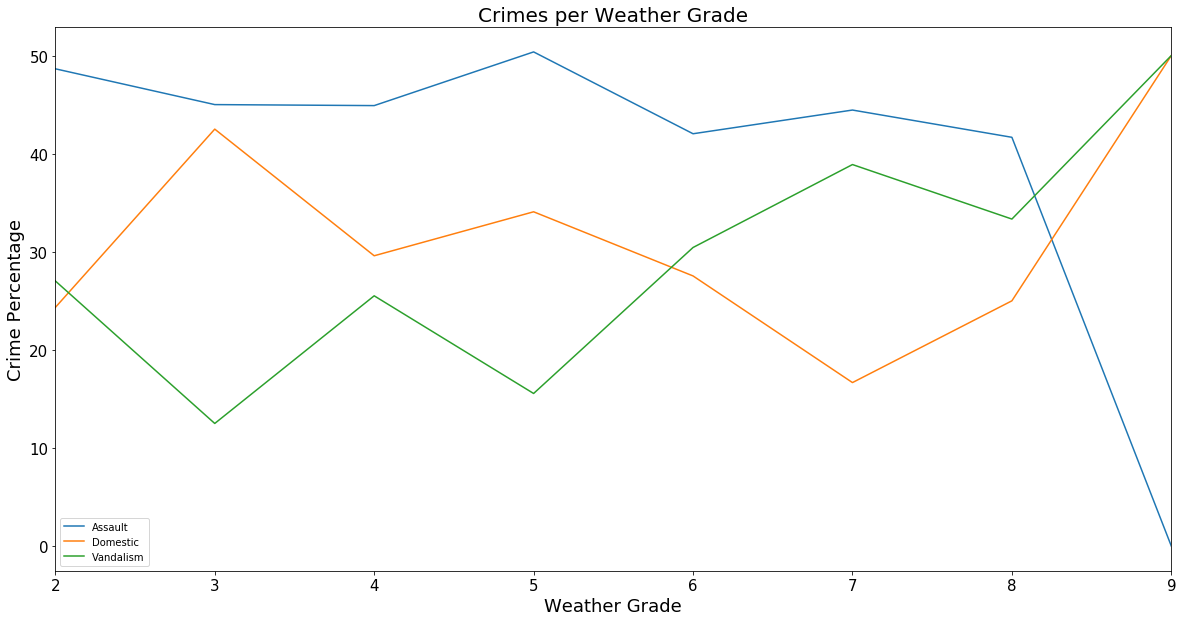

In [100]:
data = pd.DataFrame({  'Assault':[48.648649,45.0,44.897959,50.370370,42.028986,44.444444,41.666667,0.0], 
                     'Domestic':[24.324324,42.5,29.591837,34.074074,27.536232,16.666667,25.000000,50.0], 
                     'Vandalism':[27.027027,12.5,25.510204,15.555556,30.434783,38.888889,33.333333,50.0], }, 
                    index=range(2,10))

data.plot(figsize = (20, 10))
#ax.set(xlabel="Weather Grade", ylabel="Crime percentage")
plt.xlabel('Weather Grade', fontsize=18)
plt.ylabel('Crime Percentage', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Crimes per Weather Grade', fontsize = 20)
plt.show()

We can ignore the weather 9 grade here as there are two few records at this weather type. Assault is on a gradual decline from bad weather to good, and is at its lowest point at 8. Vandalism seems to be going the other way. It is at its highest at 8. 